In [1]:
import xarray

ds = xarray.open_mfdataset("/g/data/x77/ob2720/cyclone_binaries/1979027S15167.nc")
ds

<xarray.Dataset>
Dimensions:  (level: 5, time: 73, latitude: 160, longitude: 160)
Coordinates:
  * level    (level) int32 225 500 650 750 850
  * time     (time) datetime64[ns] 1979-01-27 1979-01-27T03:00:00 ... 1979-02-05
Dimensions without coordinates: latitude, longitude
Data variables:
    u        (time, level, latitude, longitude) float32 dask.array<chunksize=(73, 5, 160, 160), meta=np.ndarray>
    v        (time, level, latitude, longitude) float32 dask.array<chunksize=(73, 5, 160, 160), meta=np.ndarray>
    z        (time, level, latitude, longitude) float32 dask.array<chunksize=(73, 5, 160, 160), meta=np.ndarray>
    pv       (time, level, latitude, longitude) float32 dask.array<chunksize=(73, 5, 160, 160), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2020-11-07 11:13:12 UTC+1100 by era5_replication_tools-1.2....
    license:      Licence to use Copernicus Products: https://apps.ecmwf.int/...
    summary:      ERA5 is the fifth generation ECMWF atmospheric reanalysis o...
    title:        ERA5 pressure-levels oper u_component_of_wind 19790101-1979...

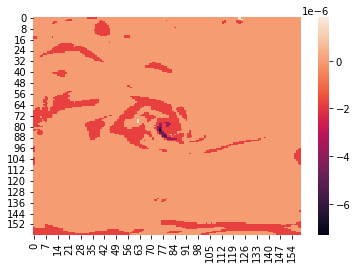

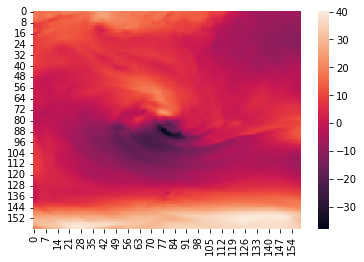

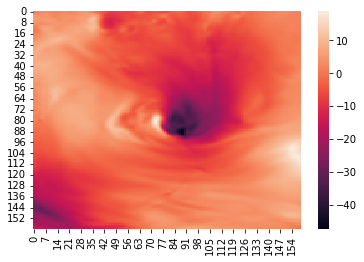

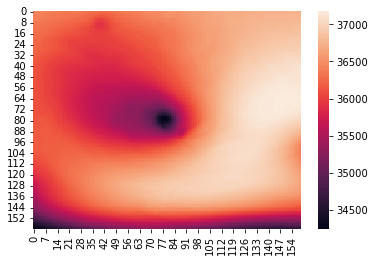

In [2]:
from importlib import reload
import visualisations
reload(visualisations)
visualisations.heatmap(ds.pv, time=-15, level=2)
visualisations.heatmap(ds.u, time=-15, level=2)
visualisations.heatmap(ds.v, time=-15, level=2)
visualisations.heatmap(ds.z, time=-15, level=2)

In [3]:
ds.u.isel(time=0,level=0)

<xarray.DataArray 'u' (latitude: 160, longitude: 160)>
dask.array<getitem, shape=(160, 160), dtype=float32, chunksize=(160, 160), chunktype=numpy.ndarray>
Coordinates:
    level    int32 225
    time     datetime64[ns] 1979-01-27
Dimensions without coordinates: latitude, longitude
Attributes:
    units:          m s**-1
    long_name:      U component of wind
    standard_name:  eastward_wind

In [4]:
import json
with open('../tracks/proc_tracks.json', 'r') as f:
    tracks = json.load(f)
ssids = list(tracks.keys())
len(ssids)

4371